In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [70]:
dataset = pd.read_csv('/content/sample_data/churn_data.csv')

In [71]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [72]:
dataset.isna().sum()

,0
user,0
churn,0
age,4
housing,0
credit_score,8031
deposits,0
withdrawal,0
purchases_partners,0
purchases,0
cc_taken,0


In [73]:
dataset = dataset[pd.notnull(dataset['age'])] # null 값 제거

In [74]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [75]:
dataset2 = dataset.drop(columns = ['user', 'churn'])

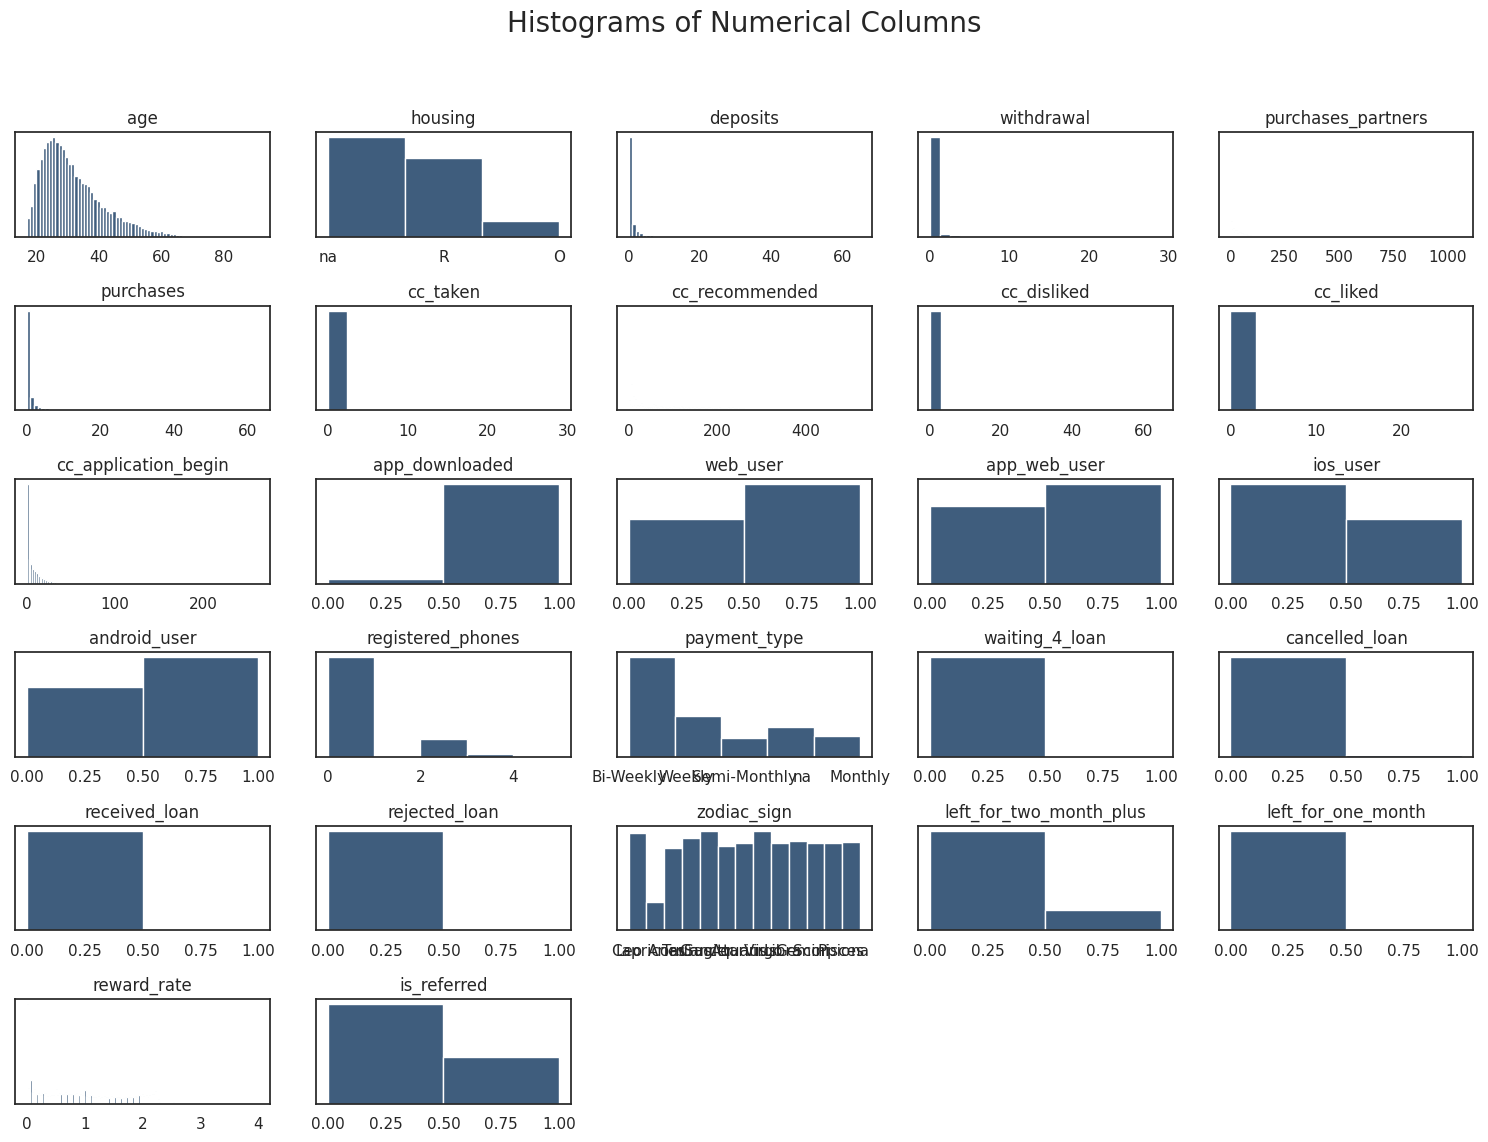

In [76]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1]+1):
  plt.subplot(6, 5, i)
  f = plt.gca()
  f.axes.get_yaxis().set_visible(False)
  f.set_title(dataset2.columns.values[i-1])

  vals = np.size(dataset2.iloc[:, i-1].unique())

  plt.hist(dataset2.iloc[:, i-1], bins = vals, color = '#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])

파이 그래프 그리기

In [77]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                   'web_user', 'app_web_user', 'ios_user',
                   'android_user', 'registered_phones', 'payment_type',
                   'waiting_4_loan', 'cancelled_loan',
                   'received_loan', 'rejected_loan', 'zodiac_sign',
                   'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

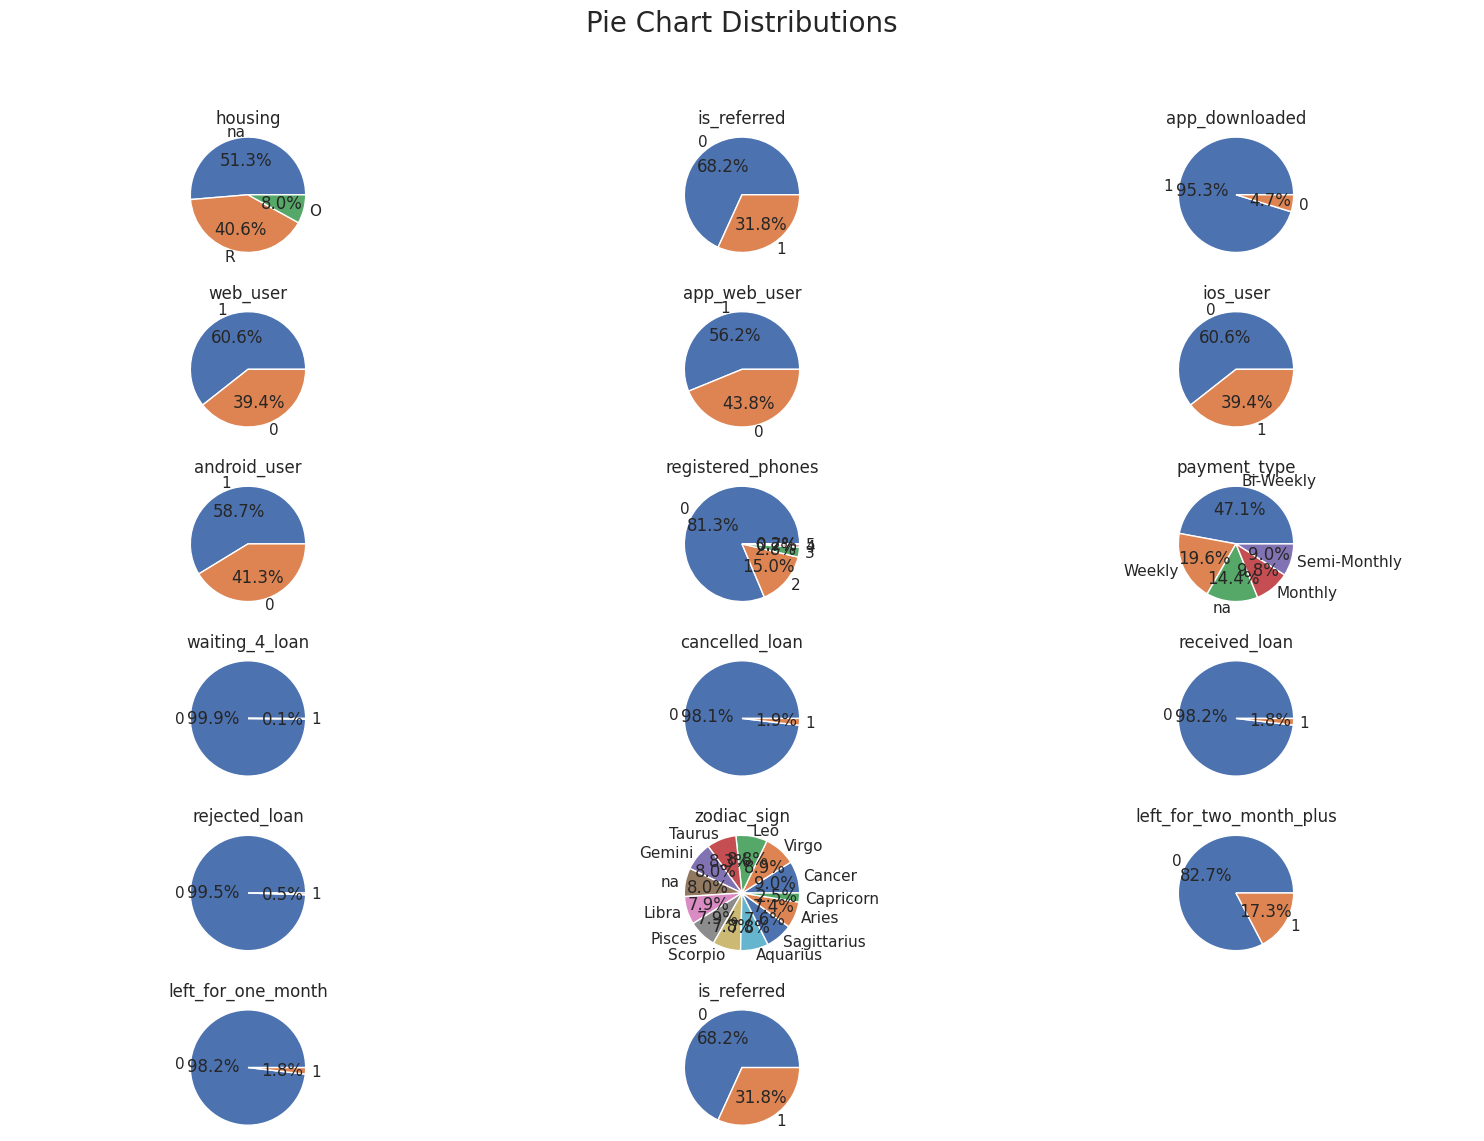

In [78]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1]+1):
  plt.subplot(6, 3, i)
  f = plt.gca()
  f.axes.get_yaxis().set_visible(False)
  f.set_title(dataset2.columns.values[i-1])
  values = dataset2.iloc[:, i-1].value_counts(normalize = True).values
  index = dataset2.iloc[:, i-1].value_counts(normalize = True).index

  plt.pie(values, labels = index, autopct = '%1.1f%%')
  plt.axis('equal')
plt.tight_layout(rect=[0,0.03,1,0.95])

In [79]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

,count
churn,
0,27
1,8


In [80]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

,count
churn,
1,274
0,234


<Axes: title={'center': 'Correlation with the Response Variable'}>

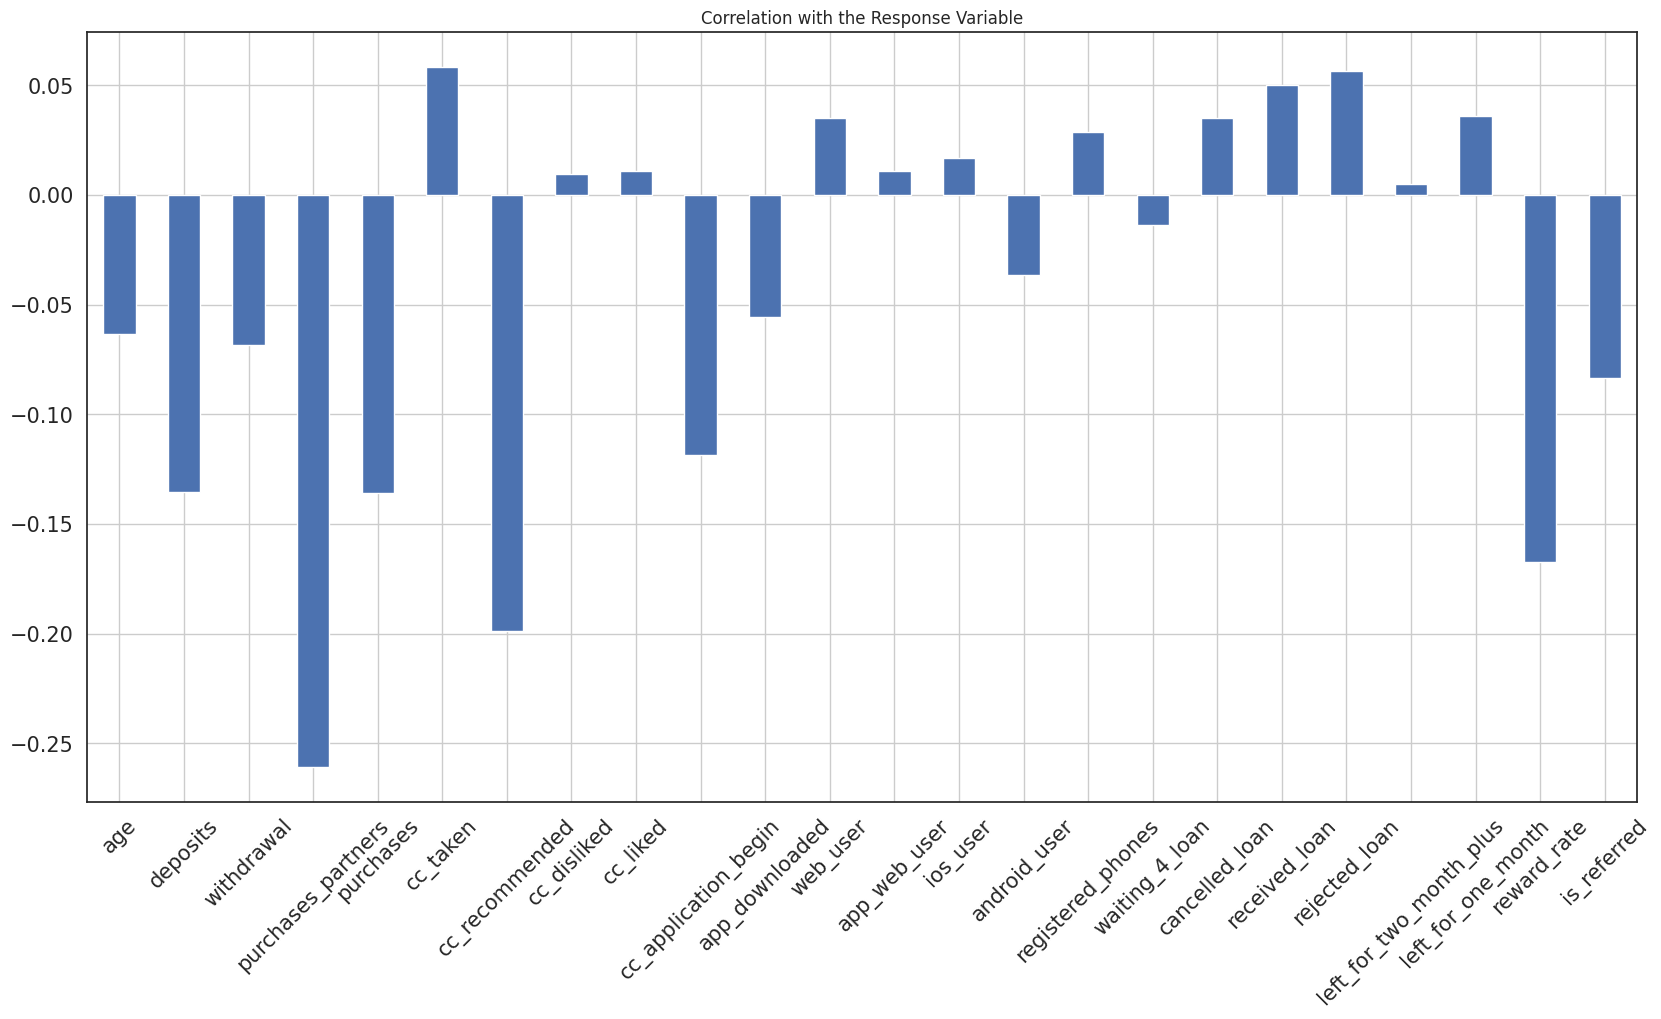

In [81]:
dataset.drop(columns = ['churn', 'user', 'housing',
                        'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(
                            figsize = (20,10), title = "Correlation with the Response Variable", fontsize = 15,
                            rot = 45, grid = True)

상관 행렬

In [83]:
dataset2

,housing,is_referred,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,is_referred
0,na,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0
1,R,1,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1
2,R,0,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,0
3,R,1,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1
4,na,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,R,1,1,1,1,0,1,2,Weekly,0,0,0,0,Leo,0,0,1
26996,na,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,1,Cancer,1,0,0
26997,na,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Taurus,0,0,0
26998,na,1,1,1,1,1,0,0,Semi-Monthly,0,0,0,0,Aries,1,0,1


<Axes: >

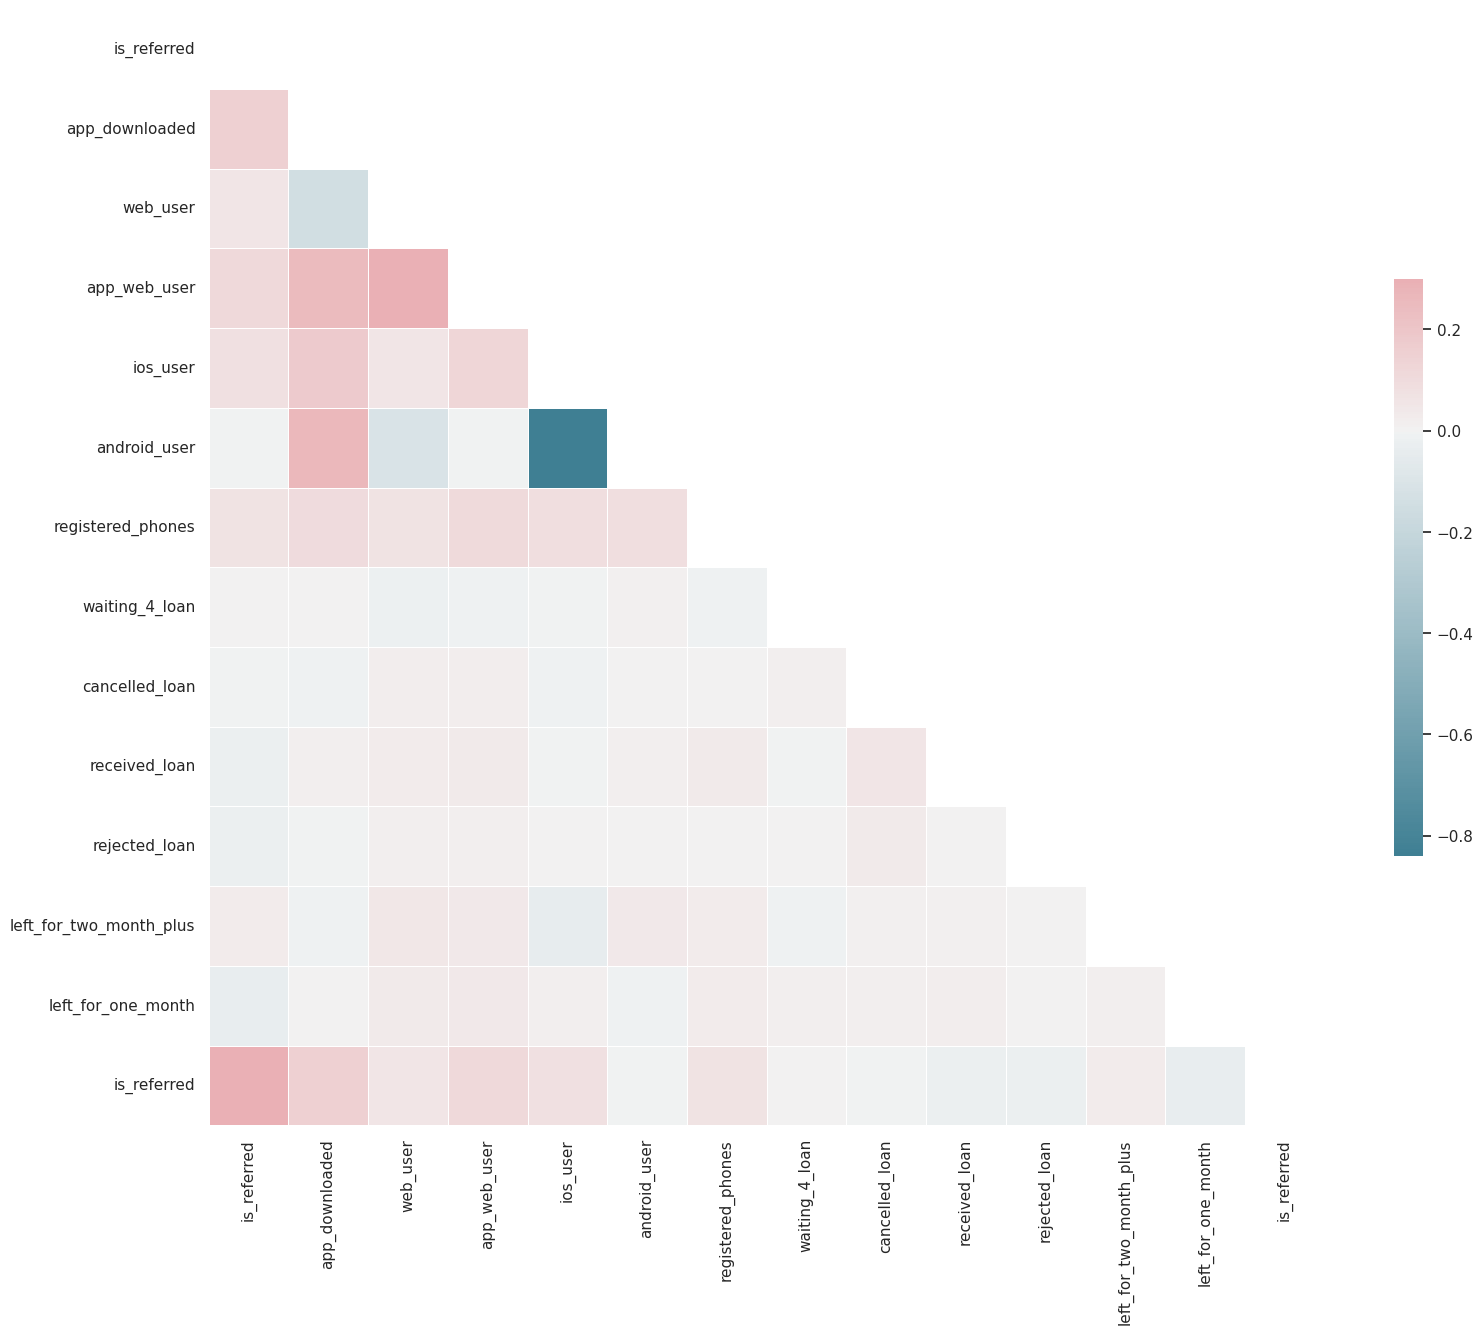

In [84]:
sns.set(style = "white")
corr = dataset2.drop(columns = ['housing', 'payment_type', 'zodiac_sign']).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18,15))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,
           square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [89]:
dataset.to_csv('new_churn_data.csv', index = False)